# Cyclist R Markdown
This is my markdown for the Cyclist capstone, it is used to show my work and explain my thoughts as I work through my data analysis. My full presentation and action report is  available on my website

### Process Data

##### Load Libraries 

In [1]:
defaultW <- getOption("warn") 

options(warn = -1) 

library(tidyverse)
library(lubridate)
library(skimr)
library(janitor)
library(dplyr)

options(warn = defaultW)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




##### Load Data

In [2]:


Trips_Jan <- read_csv("../input/cycle-data/202201-divvy-tripdata.csv")
Trips_Feb <- read_csv("../input/cycle-data/202202-divvy-tripdata.csv")
Trips_Mar <- read_csv("../input/cycle-data/202203-divvy-tripdata.csv")
Trips_Apr <- read_csv("../input/cycle-data/202204-divvy-tripdata.csv")
Trips_May <- read_csv("../input/cycle-data/202205-divvy-tripdata.csv")
Trips_Jun <- read_csv("../input/cycle-data/202106-divvy-tripdata.csv")
Trips_Jul <- read_csv("../input/cycle-data/202107-divvy-tripdata.csv")
Trips_Aug <- read_csv("../input/cycle-data/202108-divvy-tripdata.csv")
Trips_Sep <- read_csv("../input/cycle-data/202109-divvy-tripdata.csv")
Trips_Oct <- read_csv("../input/cycle-data/202110-divvy-tripdata.csv")
Trips_Nov <- read_csv("../input/cycle-data/202111-divvy-tripdata.csv")
Trips_Dec <- read_csv("../input/cycle-data/202112-divvy-tripdata.csv")



Rows: 103770 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 115609 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 284042 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

Check that all the datasets are bindedable with same rows

In [3]:
compare_df_cols_same(Trips_Jan, Trips_Feb, Trips_Mar, Trips_Apr, Trips_May, Trips_Jun, Trips_Jul, Trips_Aug, Trips_Sep, Trips_Oct, Trips_Nov, Trips_Dec)

[1] TRUE

Bind all dataframes into 1 large data frame named Trips

In [4]:
Trips <- bind_rows(Trips_Jan, Trips_Feb, Trips_Mar, Trips_Apr, Trips_May, Trips_Jun, Trips_Jul, Trips_Aug, Trips_Sep, Trips_Oct, Trips_Nov, Trips_Dec)

### Clean Data

Drop the latitude and longitude as they aren't useful to our analysis 

In [5]:
Trips <- Trips %>%
  select(-c(start_lat, start_lng, end_lat, end_lng))

Make the start time into more useable columns of data

In [6]:
Trips$date <- as.Date(Trips$started_at) #the default format is yyyy-mm-dd
Trips$month <- format(as.Date(Trips$date), "%B") # make month into columns named after each month
Trips$day <- format(as.Date(Trips$date), "%d") # make day into a column by number
Trips$year <- format(as.Date(Trips$date), "%Y") # make year into a column
Trips$day_of_week <- format(as.Date(Trips$date), "%A") # make day into a column by name


Check both columns member_casual and rideable_type for their different values

docked_bike is a bike in maintenance we will nedd to remove those before we analysis our data

In [7]:
unique(Trips$member_casual)
unique(Trips$rideable_type)

[1] "casual" "member"

[1] "electric_bike" "classic_bike"  "docked_bike"

Create a new variable ride length to measure the time spent using a bike

In [8]:
Trips$ride_length <- difftime(Trips$ended_at,Trips$started_at) #creates new column ride_length 


Drop all NA rows if

In [9]:
Trips <- drop_na(Trips)

How many distinct riders are there in our data set

In [10]:
Trips%>% distinct(ride_id, .keep_all =TRUE) %>% nrow(.)

[1] 4667299

Check if ride_length is a factor

In [11]:
is.factor(Trips$ride_length) #returns boolean if ride_length is a factor

[1] FALSE

Make ride lenth into a numeric variable

In [12]:
Trips$ride_length <- as.numeric(as.character(Trips$ride_length)) #makes ride_length into numeric data type

Check if ride length is numeric

In [13]:
is.numeric(Trips$ride_length) #returns a boolean if ride_length is numeric

[1] TRUE

Remove docked bikes as they are in maintenance and any trips equal to or less than 0 as those aren't trips

In [14]:
Trips_v2 <- Trips[!(Trips$rideable_type == "docked_bike" | Trips$ride_length<=0),]
#rides cannot be 0 or less time and docked bikes are under going testing

### Analyse

Check basic statistic attributes of ride length

In [15]:
mean(Trips_v2$ride_length) #mean ride length
median(Trips_v2$ride_length) #median ride length
max(Trips_v2$ride_length) #longest ride
min(Trips_v2$ride_length) #shortest ride


[1] 1020.343

[1] 665

[1] 89994

[1] 1

Compare basic sstatistic attributes between members and casuals

In [16]:
aggregate(Trips_v2$ride_length ~ Trips_v2$member_casual, FUN = mean) # mean for members and casuals
aggregate(Trips_v2$ride_length ~ Trips_v2$member_casual, FUN = median) # median for members and casuals
aggregate(Trips_v2$ride_length ~ Trips_v2$member_casual, FUN = max) # max for each members and casuals
aggregate(Trips_v2$ride_length ~ Trips_v2$member_casual, FUN = min) # min for each members and casuals

Trips_v2$member_casual,Trips_v2$ride_length
<chr>,<dbl>
casual,1414.3769
member,760.5862


Trips_v2$member_casual,Trips_v2$ride_length
<chr>,<dbl>
casual,881
member,556


Trips_v2$member_casual,Trips_v2$ride_length
<chr>,<dbl>
casual,89994
member,89738


Trips_v2$member_casual,Trips_v2$ride_length
<chr>,<dbl>
casual,1
member,1


Order our days of the week and months

In [17]:
#Order the days of the week
Trips_v2$day_of_week <- ordered(Trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
Trips_v2$month <- ordered(Trips_v2$month, levels=c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November",
                                                       "December"))

Now use days of the week to get our statisticial attributes for members vs casuals

In [18]:
#Now, let's run the average ride time by each day for members vs casual users
aggregate(Trips_v2$ride_length ~ Trips_v2$member_casual + Trips_v2$day_of_week, FUN = mean)

Trips_v2$member_casual,Trips_v2$day_of_week,Trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,1609.8670
member,Sunday,867.1001
casual,Monday,1427.3289
member,Monday,736.6089
casual,Tuesday,1252.8928
member,Tuesday,711.8735
casual,Wednesday,1239.2664
member,Wednesday,721.8303
casual,Thursday,1247.8053


Do the same for months

In [19]:
aggregate(Trips_v2$ride_length ~ Trips_v2$member_casual + Trips_v2$month, FUN = mean)

Trips_v2$member_casual,Trips_v2$month,Trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,January,1009.7752
member,January,616.1954
casual,February,1145.2507
member,February,638.7056
casual,March,1416.5704
member,March,707.8145
casual,April,1354.6937
member,April,696.5853
casual,May,1466.2668


Get means and total ride count for members and causals by day of the week

In [20]:
Trips_v2 %>% 
  group_by(member_casual, day_of_week) %>%  #groups by member type and weekday
  summarise(number_of_rides = n() #calculates the number of rides 
            ,average_duration = mean(ride_length)) %>% # calculates the average duration
  arrange(member_casual, day_of_week)	# sorts

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,day_of_week,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sunday,325441,1609.8670
casual,Monday,201857,1427.3289
casual,Tuesday,191803,1252.8928
casual,Wednesday,192465,1239.2664
casual,Thursday,209572,1247.8053
casual,Friday,243114,1330.5341
casual,Saturday,381334,1555.2847
member,Sunday,314098,867.1001
member,Monday,375438,736.6089


Do the same but for month

In [21]:
Trips_v2 %>% 
  group_by(member_casual, month) %>%  #groups by member type and month
  summarise(number_of_rides = n() #calculates the number of rides 
            ,average_duration = mean(ride_length)) %>% # calculates the average duration
  arrange(member_casual, month)	# sorts

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,month,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,January,11662,1009.7752
casual,February,13799,1145.2507
casual,March,58929,1416.5704
casual,April,79909,1354.6937
casual,May,194112,1466.2668
casual,June,252469,1564.3321
casual,July,311703,1479.8097
casual,August,296398,1434.0054
casual,September,257583,1396.1838


Create counts of causal riders that used classic bikes or electric

In [22]:
classic_casual <- NROW(filter(Trips_v2, member_casual == "casual" & (rideable_type == "classic_bike")))
classic_casual

electric_casual <- NROW(filter(Trips_v2, member_casual == "casual" & (rideable_type == "electric_bike")))
electric_casual

[1] 1231669

[1] 513917

Find the percent of casual riders that use classic bikes vs electric

In [23]:
bikes <- c("Electric", "Classic")
bikes_casual_total <- c(electric_casual, classic_casual)
percent <- round(100* bikes_casual_total / sum(bikes_casual_total), 2)
bike_total <- paste(bikes, percent)
bike_total_casual <- paste(bike_total, "%", sep="")

bike_total_casual

[1] "Electric 29.44%" "Classic 70.56%"

Create counts of member riders that used classic bikes or electric

In [24]:
classic_member <- NROW(filter(Trips_v2, member_casual == "member" & (rideable_type == "classic_bike")))
classic_member

electric_member <- NROW(filter(Trips_v2, member_casual == "member" & (rideable_type == "electric_bike")))
electric_member

[1] 1977831

[1] 670106

Find the percent of member riders that use classic bikes vs electric

In [25]:
bikes <- c("Electric", "Classic")
bikes_member_total <- c(electric_member, classic_member)
percent <- round(100* bikes_member_total / sum(bikes_member_total), 2)
bike_total <- paste(bikes, percent)
bike_total_member <- paste(bike_total, "%", sep="")

bike_total_member

[1] "Electric 25.31%" "Classic 74.69%"

Create counts of casual riders that used bikes on the weekdays vs weekends

In [26]:
weekend_casual <- NROW(filter(Trips_v2, member_casual == "casual" & (day_of_week == "Saturday" | day_of_week == "Sunday")))
weekend_casual

weekday_casual <- NROW(filter(Trips_v2, member_casual == "casual" & !(day_of_week == "Saturday" | day_of_week == "Sunday")))
weekday_casual


[1] 706775

[1] 1038811

Finds the percent of rides by casual of weekday vs weekend

In [27]:
complete_week <- c("Weekday", "Weekend")
casual_week <- c(weekday_casual, weekend_casual)
percent <- round(100* casual_week / sum(casual_week), 2)
week_total <- paste(complete_week, percent)
week_total_casual <- paste(week_total, "%", sep="")

week_total_casual

[1] "Weekday 59.51%" "Weekend 40.49%"

Create counts of member riders that used bikes on weekends vs weekdays

In [28]:
weekend_member <- NROW(filter(Trips_v2, member_casual == "member" & (day_of_week == "Saturday" | day_of_week == "Sunday")))
weekend_member

weekday_member <- NROW(filter(Trips_v2, member_casual == "member" & !(day_of_week == "Saturday" | day_of_week == "Sunday")))
weekday_member

[1] 665087

[1] 1982850

Finds percent of members that used bikes weekdays vs weekends

In [29]:
complete_week <- c("Weekday", "Weekend")
member_week <- c(weekday_member, weekend_member)
percent <- round(100* member_week / sum(member_week), 2)
week_total <- paste(complete_week, percent)
week_total_member <- paste(week_total, "%", sep="")

week_total_member

[1] "Weekday 74.88%" "Weekend 25.12%"

Compares total casual riders uses of electric vs classic bikes and their average rides

In [30]:
Trips_v2 %>%
  group_by(member_casual,rideable_type) %>% # groups by rider type, and bike type
  summarise(number_of_rides = n() # calculates the number of riders
            ,average_duration = mean(ride_length)) %>% #calculates the average length
  arrange(member_casual, rideable_type)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,rideable_type,number_of_rides,average_duration
<chr>,<chr>,<int>,<dbl>
casual,classic_bike,1231669,1526.7611
casual,electric_bike,513917,1145.0336
member,classic_bike,1977831,787.2046
member,electric_bike,670106,682.0214


### Visualize 

Graph riders per day members vs casual

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


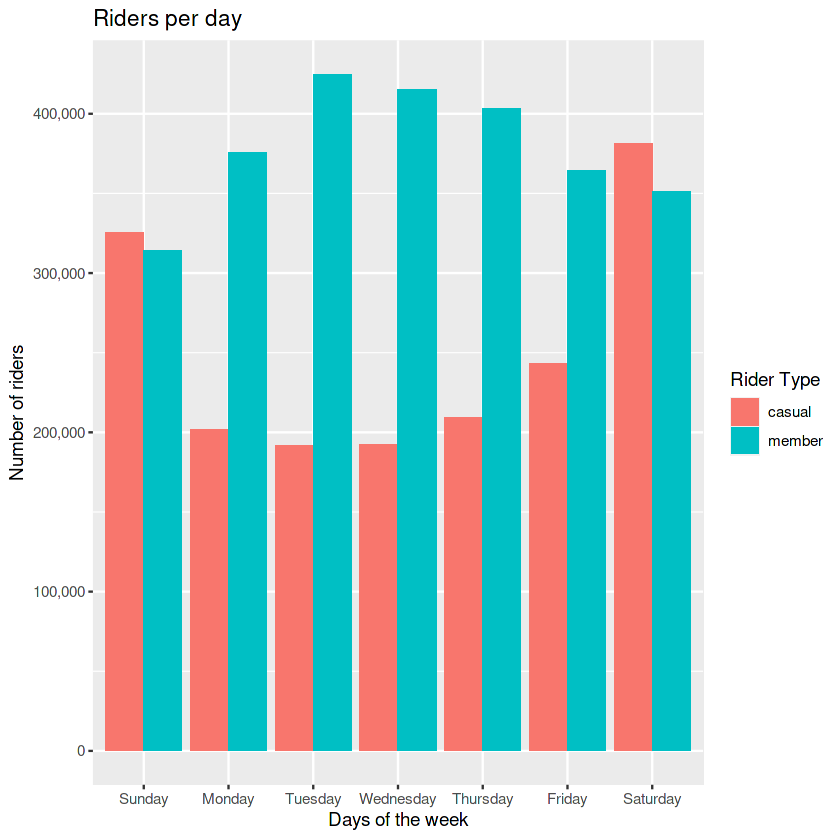

In [31]:
Trips_v2 %>% 
  group_by(member_casual, day_of_week) %>% #groups members by type, and days of the week by day
  summarise(number_of_rides = n() #calculates number of riders
            ,average_duration = mean(ride_length)) %>% #calculates average ride length
  arrange(member_casual, day_of_week)  %>% #arranges by member type, and day of the week
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) + #plots x as weekday and y as number of rides
  scale_y_continuous(labels = scales::comma) +
  geom_col(position = "dodge") + #uses column graph
  labs(title = "Riders per day", x = "Days of the week", y = "Number of riders", fill = "Rider Type") # lables grap

Graph Electric vs Classic bike and casual vs member

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


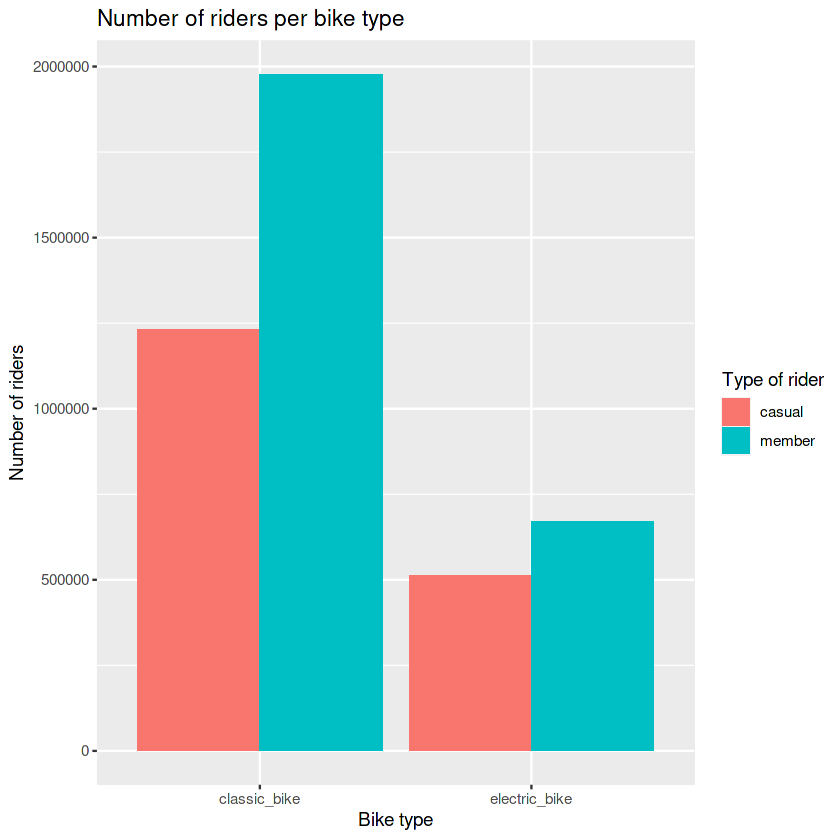

In [32]:
Trips_v2 %>% 
  group_by(member_casual,rideable_type) %>% # groups by rider type, and bike type
  summarise(number_of_rides = n())%>% # counts the number of riders 
  arrange(member_casual, rideable_type) %>% #arranges by rider type and bike type
  ggplot(aes(x = rideable_type, y = number_of_rides, fill = member_casual)) + #x = bike type, y = number of rides
  geom_col(position = "dodge") +
  labs(title = "Number of riders per bike type", x = "Bike type", y = "Number of riders", fill = "Type of rider")


Graph rider type per month

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


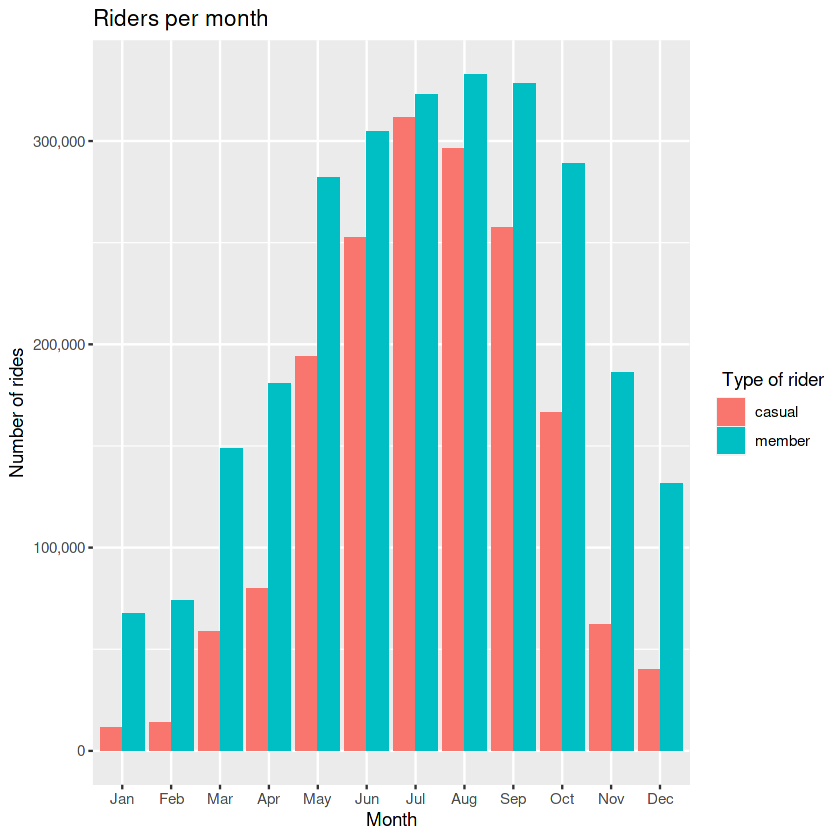

In [33]:
Trips_v2 %>% 
  mutate(months = month(started_at, label = TRUE)) %>% #uses each day as a independent variable
  group_by(member_casual, months) %>% #groups members by type, and days of the week by day
  summarise(number_of_rides = n() #calculates number of riders
            ,average_duration = mean(ride_length)) %>% #calculates average ride length
  arrange(member_casual, months)  %>% #arranges by member type, and day of the week
  ggplot(aes(x = months, y = number_of_rides, fill = member_casual)) + #plots x as weekday and y as number of rides
  scale_y_continuous(labels = scales::comma) +
  geom_col(position = "dodge") + #uses column graph
  labs(title = "Riders per month", x = "Month", y = "Number of rides", fill = " Type of rider") # lables grap

graph average ride length per month by rider type

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


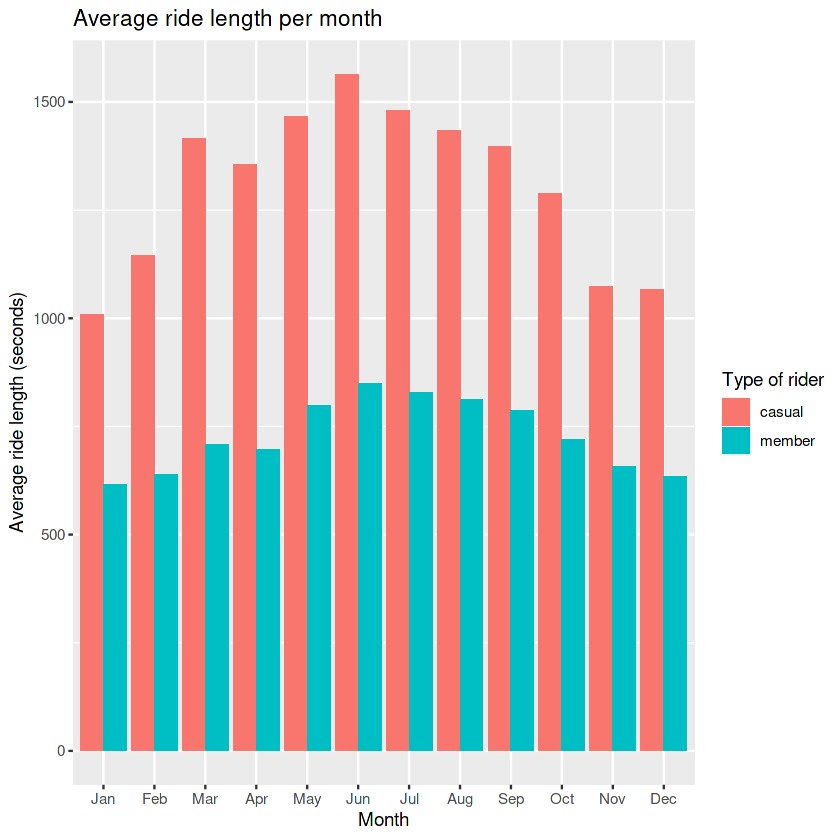

In [34]:
Trips_v2 %>% 
  mutate(months = month(started_at, label = TRUE)) %>% #uses month as a separate variable
  group_by(member_casual, months) %>% #groups by rider type and month
  summarise(number_of_rides = n() # counts the number of riders
            ,average_duration = mean(ride_length)) %>% #calculates the average ride length
  arrange(member_casual, months)  %>% #arranges by rider type and month
  ggplot(aes(x = months, y = average_duration, fill = member_casual)) + #x is month, y is average duration
  geom_col(position = "dodge") + 
  labs(title = "Average ride length per month", x = "Month", y = "Average ride length (seconds)", fill = "Type of rider")


Graph casual riders electric vs classic bike use as a pie chart

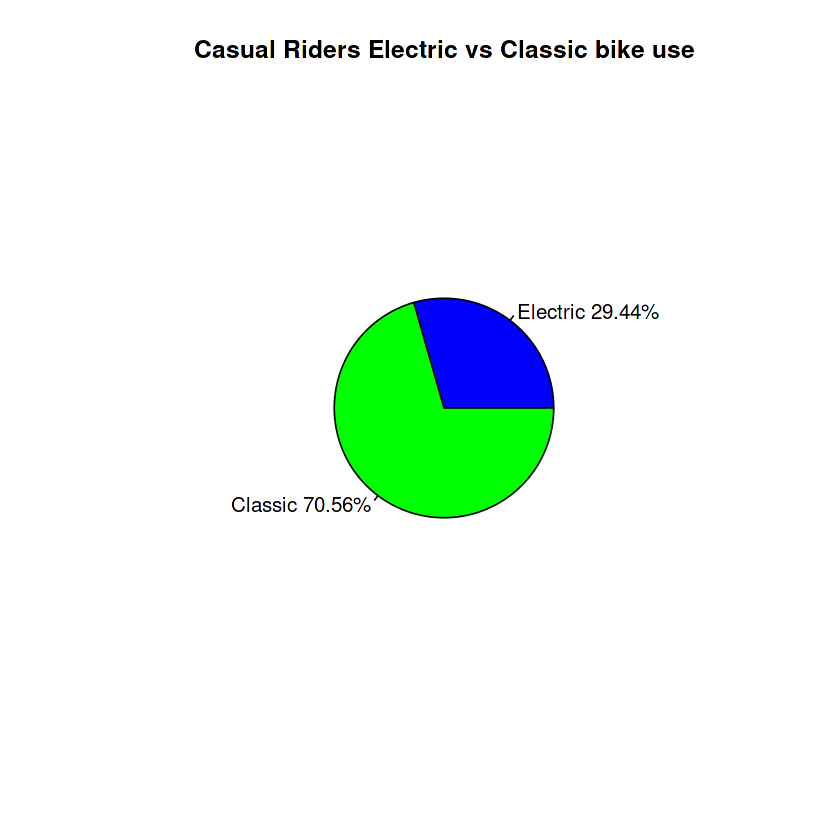

In [35]:
pie(bikes_casual_total, labels = bike_total_casual, col = c("blue", "green"), main = "Casual Riders Electric vs Classic bike use")

Graph mebers electric vs classic bike use

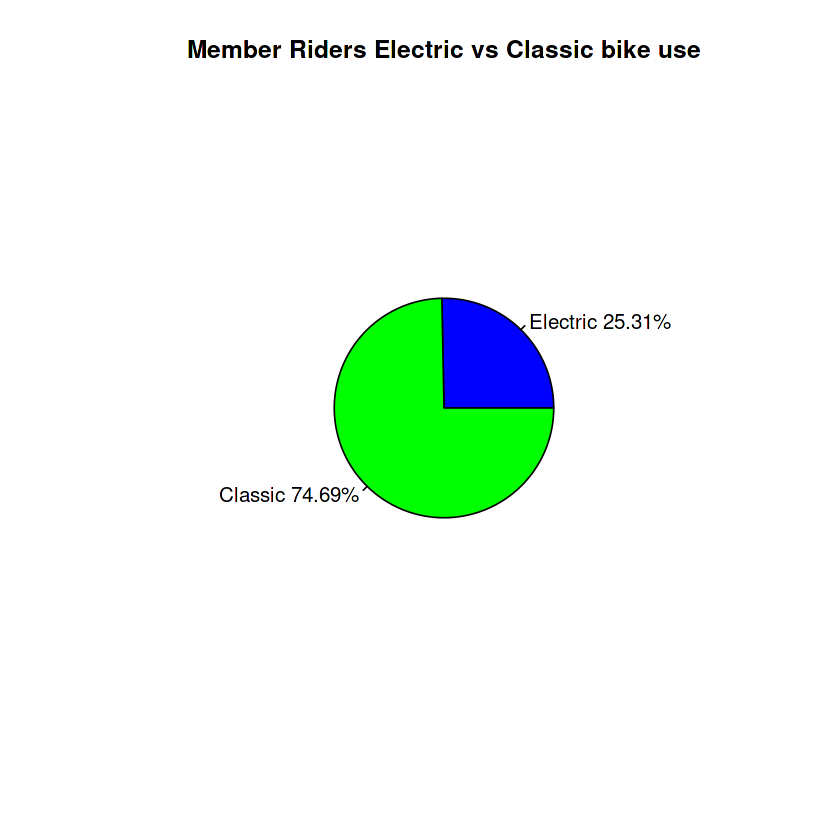

In [36]:
pie(bikes_member_total, labels = bike_total_member, col = c("blue", "green"), main = "Member Riders Electric vs Classic bike use")

Graph casual riders weekday vs weekend as a pie chart

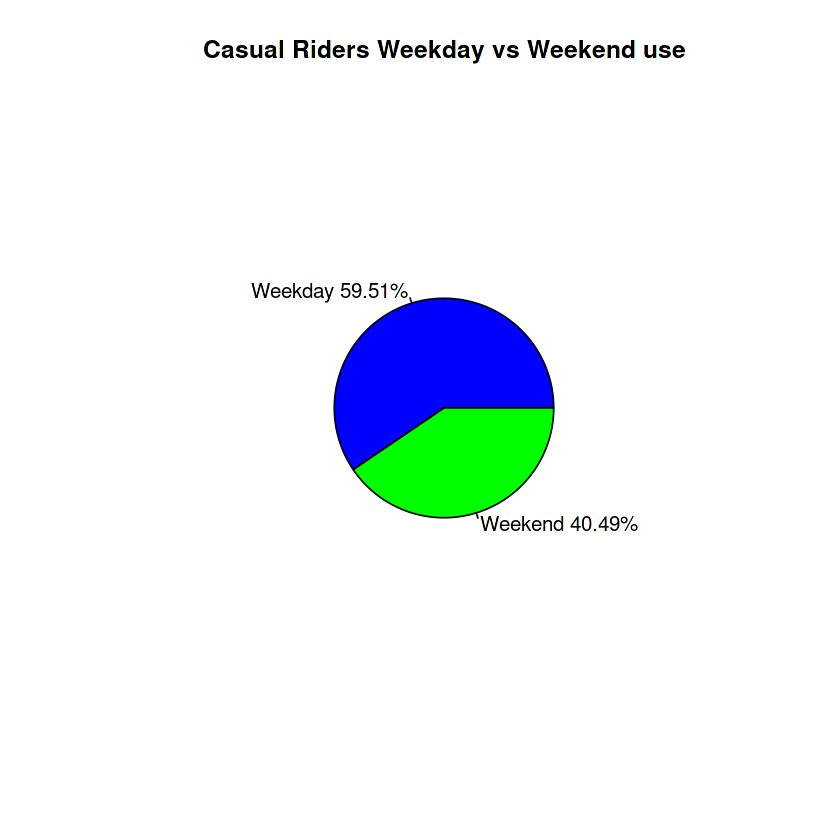

In [37]:
pie(casual_week, labels = week_total_casual, col = c("blue", "green"), main = "Casual Riders Weekday vs Weekend use")

Graph member weekend and weekday bike use as a pie chart

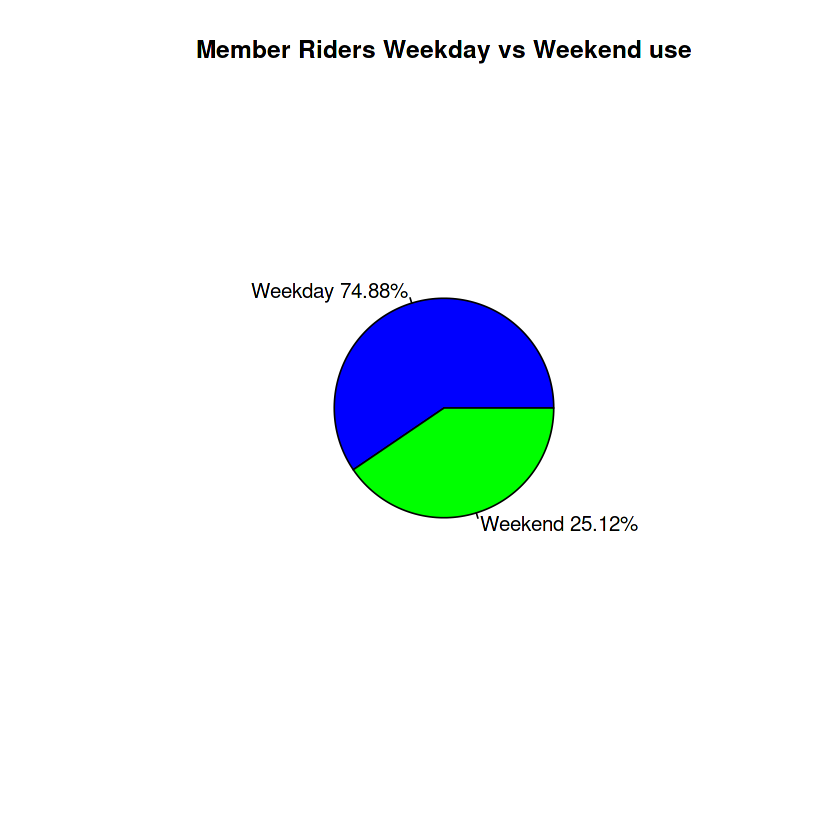

In [38]:
pie(casual_week, labels = week_total_member, col = c("blue", "green"), main = "Member Riders Weekday vs Weekend use")